In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
data = pd.read_excel("Evaluation.xlsx", sheet_name='Sheet2')
data.head()

,,Sample,Accuracy,Precision Positive,Recall,Precision Negative,Specificity,F1 Score,AUC
0,Decision Tree,Train,64.5,89.5,67.7,14.6,40.9,77.0,-
1,NaN,Test,61.7,88.1,65.8,9.5,28.8,75.4,50.1
2,Random Forest,Train,89.3,92.2,91.7,83.4,84.3,92.0,-
3,NaN,Test,55.8,67.1,66.6,33.6,34.0,66.8,52.1
4,SVM,Train,67.8,99.7,67.5,4.0,86.3,80.5,-


In [51]:
classes = np.array(['Decision Tree', 'Random Forest', 'SVM', 'XGBoost'])

sample = ['Test', 'Train']

precision1P = data.loc[data['Sample'] == sample[0], 'Precision Positive']
precision2P = data.loc[data['Sample'] == sample[1], 'Precision Positive']

precision1N = data.loc[data['Sample'] == sample[0], 'Precision Negative']
precision2N = data.loc[data['Sample'] == sample[1], 'Precision Negative']

accuracy1 = data.loc[data['Sample'] == sample[0], 'Accuracy']
accuracy2 = data.loc[data['Sample'] == sample[1], 'Accuracy']

recall1 = data.loc[data['Sample'] == sample[0], 'Recall']
recall2 = data.loc[data['Sample'] == sample[1], 'Recall']

espec1 = data.loc[data['Sample'] == sample[0], 'Specificity']
espec2 = data.loc[data['Sample'] == sample[1], 'Specificity']

fscore1 = data.loc[data['Sample'] == sample[0], 'F1 Score']
fscore2 = data.loc[data['Sample'] == sample[1], 'F1 Score']

In [52]:
metrics = pd.DataFrame({
    'Models': classes,
    f'Precision2 {sample[0]}': precision1P.values,
    f'Precision2 {sample[1]}': precision2P.values,
    f'Precision3 {sample[0]}': precision1N.values,
    f'Precision3 {sample[1]}': precision2N.values,
    f'Accuracy {sample[0]}': accuracy1.values,
    f'Accuracy {sample[1]}': accuracy2.values,
    f'Recall {sample[0]}': recall1.values,
    f'Recall {sample[1]}': recall2.values,
    f'Especificity {sample[0]}': espec1.values,
    f'Especificity {sample[1]}': espec2.values,
    f'F1 Score {sample[0]}': fscore1.values,
    f'F1 Score {sample[1]}': fscore2.values
})

metrics.head()

,Models,Precision2 Test,Precision2 Train,Precision3 Test,Precision3 Train,Accuracy Test,Accuracy Train,Recall Test,Recall Train,Especificity Test,Especificity Train,F1 Score Test,F1 Score Train
0,Decision Tree,88.1,89.5,9.5,14.6,61.7,64.5,65.8,67.7,28.8,40.9,75.4,77.0
1,Random Forest,67.1,92.2,33.6,83.4,55.8,89.3,66.6,91.7,34.0,84.3,66.8,92.0
2,SVM,99.0,99.7,1.7,4.0,66.3,67.8,66.6,67.5,47.0,86.3,79.6,80.5
3,XGBoost,55.6,68.0,49.3,71.0,53.4,69.0,68.4,82.5,35.9,52.6,61.4,74.5


In [53]:
tidy = metrics[['Models', f'Precision2 {sample[0]}', f'Precision3 {sample[0]}', f'Accuracy {sample[0]}', f'Recall {sample[0]}', f'Especificity {sample[0]}', f'F1 Score {sample[0]}']].melt(id_vars='Models').rename(columns=str.title)
tidy.head()

,Models,Variable,Value
0,Decision Tree,Precision2 Test,88.1
1,Random Forest,Precision2 Test,67.1
2,SVM,Precision2 Test,99.0
3,XGBoost,Precision2 Test,55.6
4,Decision Tree,Precision3 Test,9.5


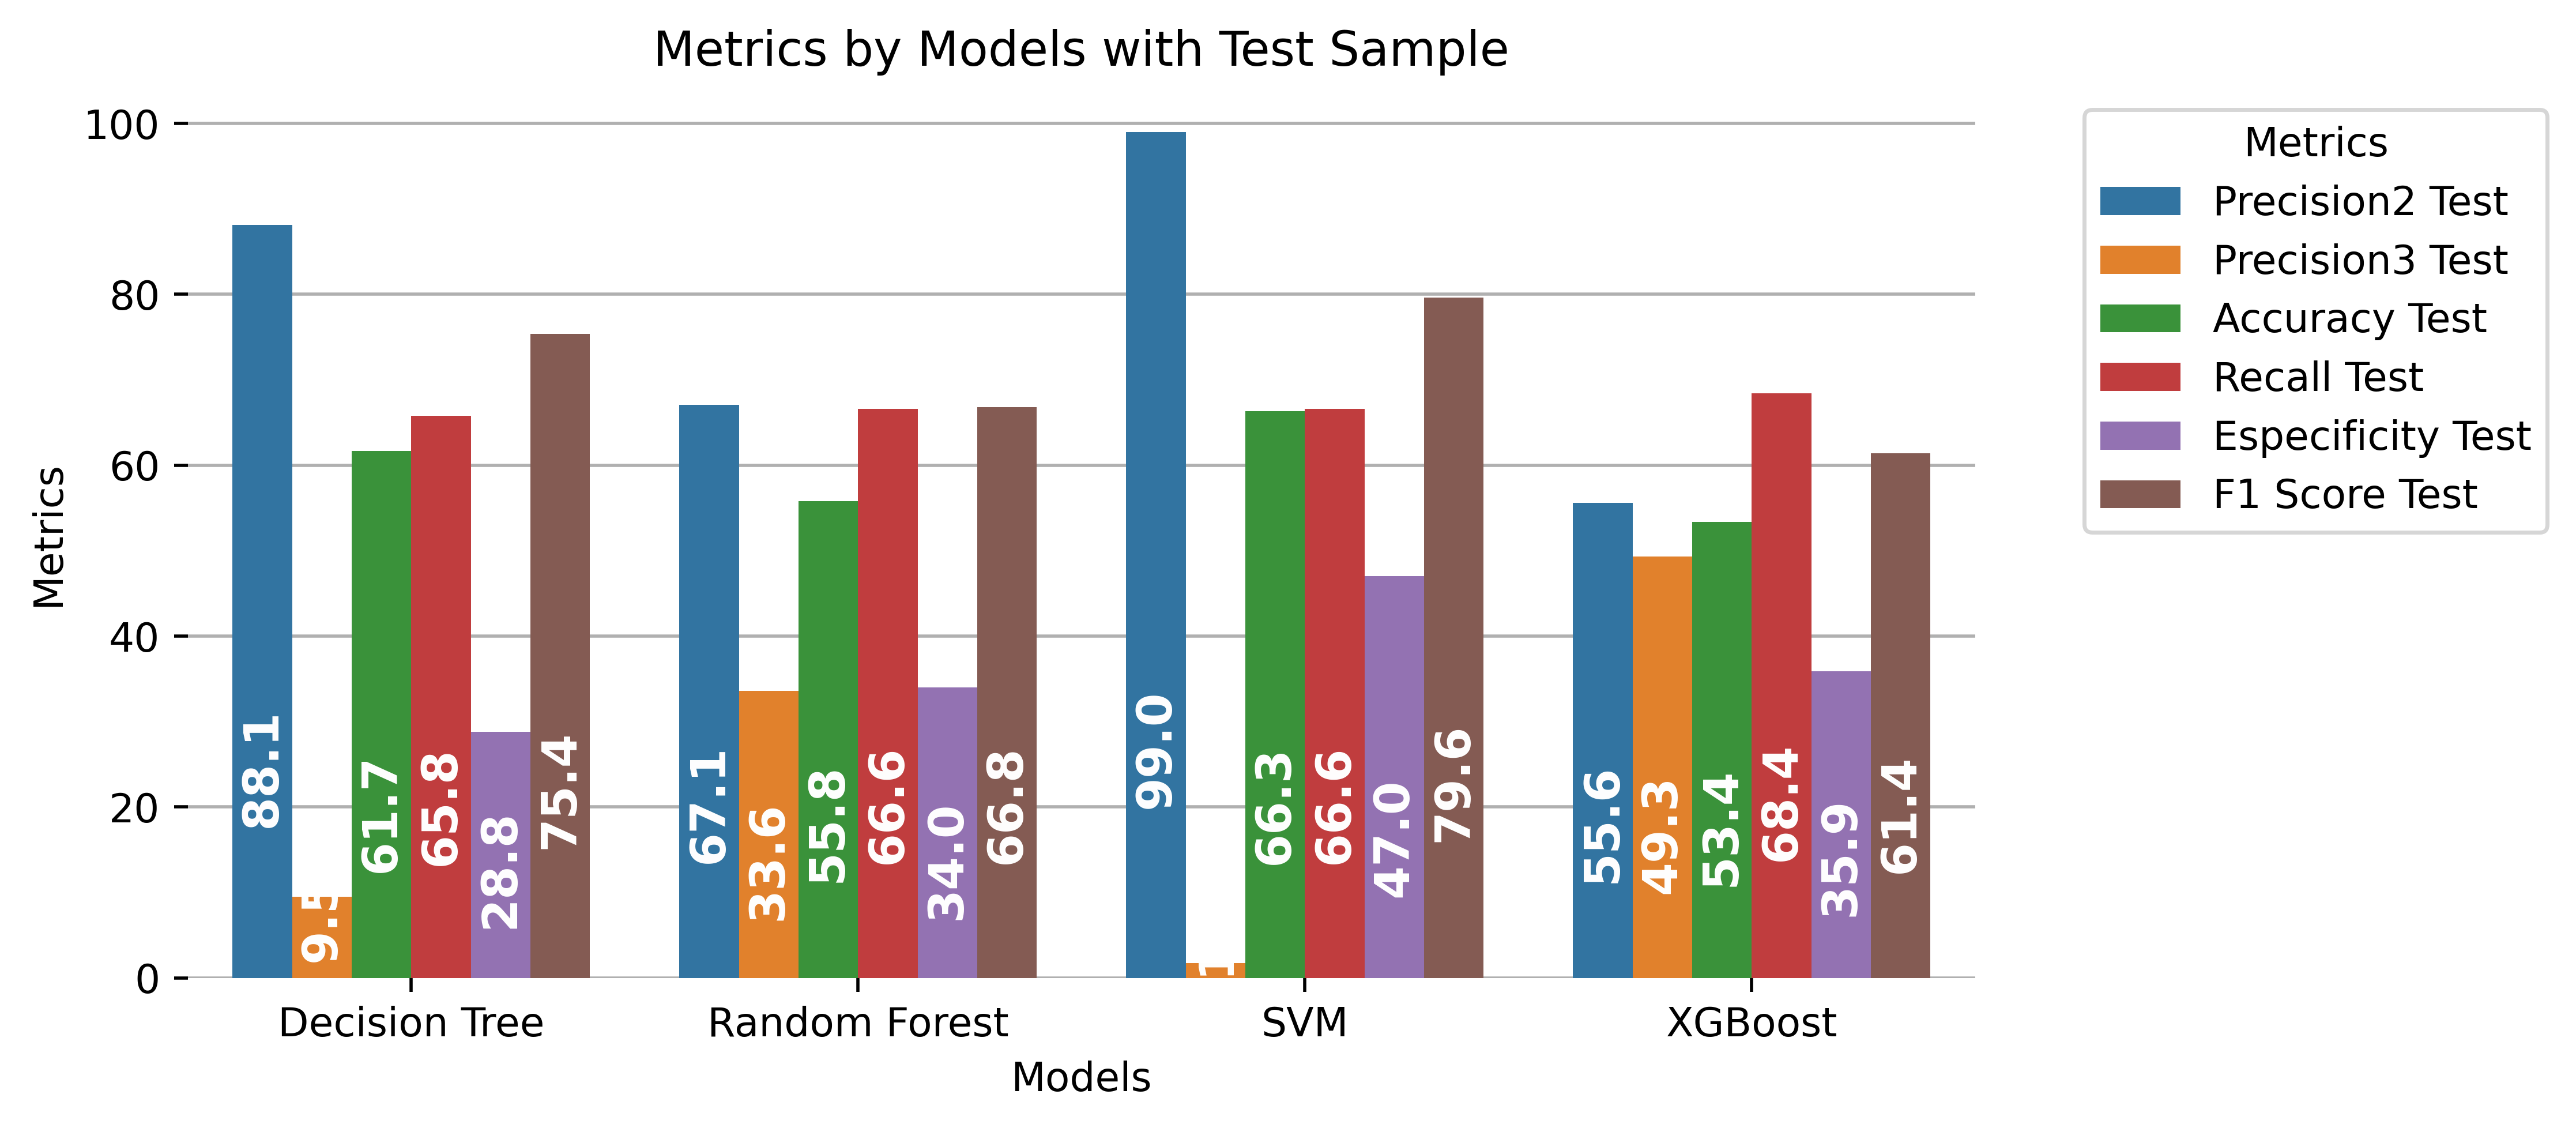

In [54]:
plt.figure(figsize=(8, 4), dpi=500)
ax = sns.barplot(x='Models', y='Value', hue='Variable', data=tidy)

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2., 0.2 * patch.get_height(),
           round(patch.get_height(), 2),
           ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=90, color='white')

# Removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Coloca as grades para trás
ax.set_axisbelow(True)

plt.legend(
        title='Metrics',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
)
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.grid(axis='y')
plt.title('Metrics by Models with Test Sample')
plt.show()

In [55]:
tidy = metrics[['Models', f'Precision2 {sample[1]}', f'Precision3 {sample[1]}', f'Accuracy {sample[1]}', f'Recall {sample[1]}', f'Especificity {sample[1]}', f'F1 Score {sample[1]}']].melt(id_vars='Models').rename(columns=str.title)
tidy.head()

,Models,Variable,Value
0,Decision Tree,Precision2 Train,89.5
1,Random Forest,Precision2 Train,92.2
2,SVM,Precision2 Train,99.7
3,XGBoost,Precision2 Train,68.0
4,Decision Tree,Precision3 Train,14.6


In [56]:
tidy.tail()

,Models,Variable,Value
19,XGBoost,Especificity Train,52.6
20,Decision Tree,F1 Score Train,77.0
21,Random Forest,F1 Score Train,92.0
22,SVM,F1 Score Train,80.5
23,XGBoost,F1 Score Train,74.5


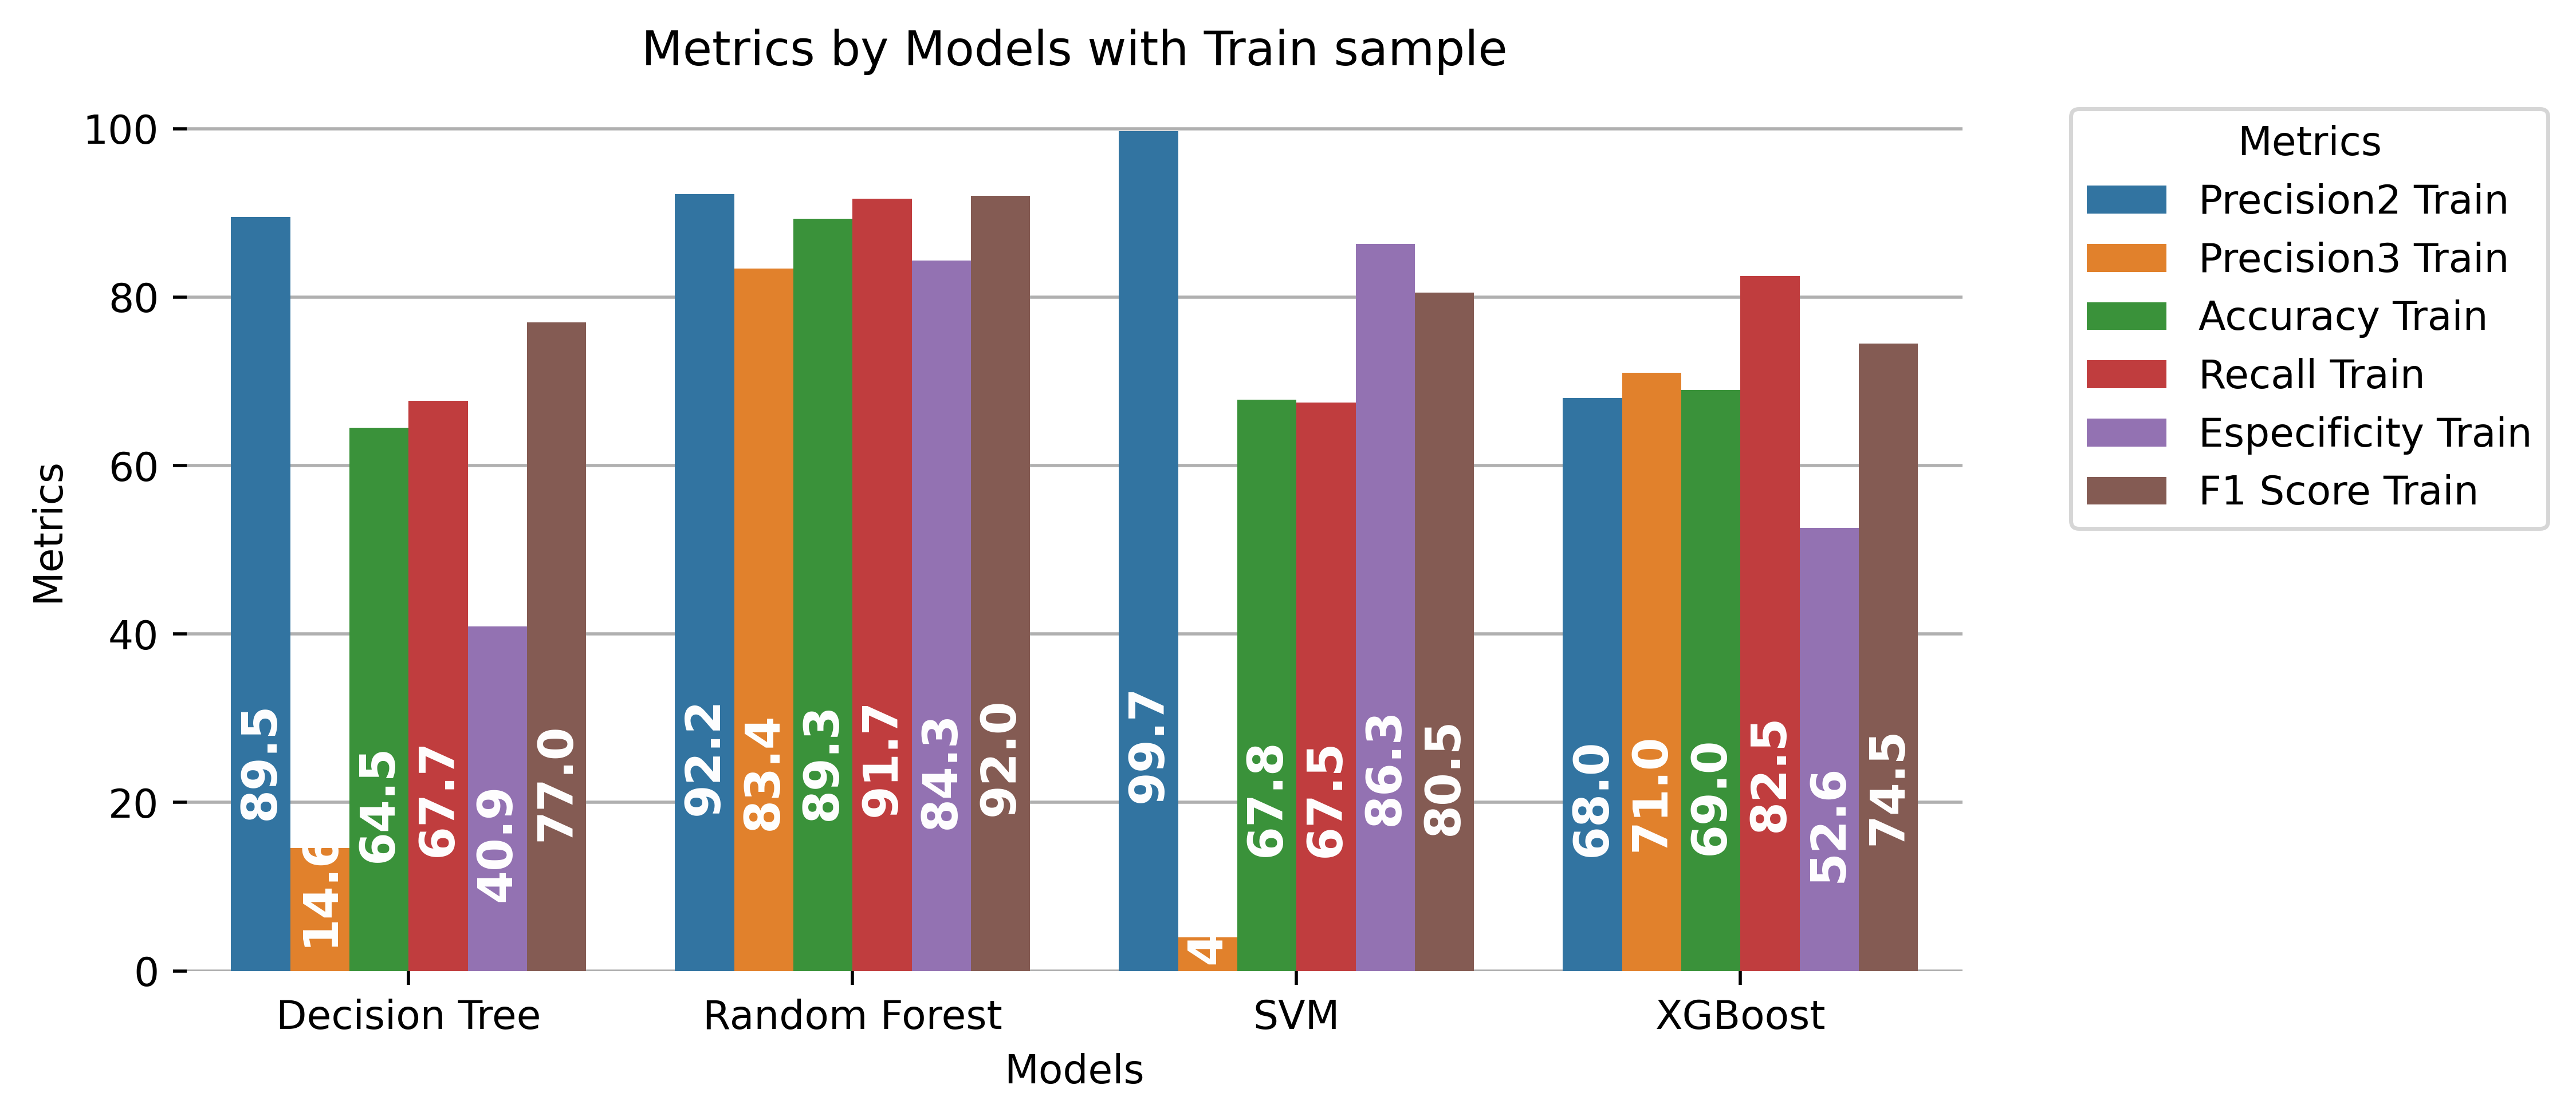

In [57]:
plt.figure(figsize=(8, 4), dpi=500)
ax = sns.barplot(x='Models', y='Value', hue='Variable', data=tidy)

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2., 0.2 * patch.get_height(),
           round(patch.get_height(), 2),
           ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=90, color='white')

# Removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Coloca as grades para trás
ax.set_axisbelow(True)

plt.legend(
        title='Metrics',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
)
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.grid(axis='y')
plt.title('Metrics by Models with Train sample')
plt.show()

In [58]:
%%capture
fig, axes = plt.subplots(figsize=(9, 32), nrows=6, ncols=1)

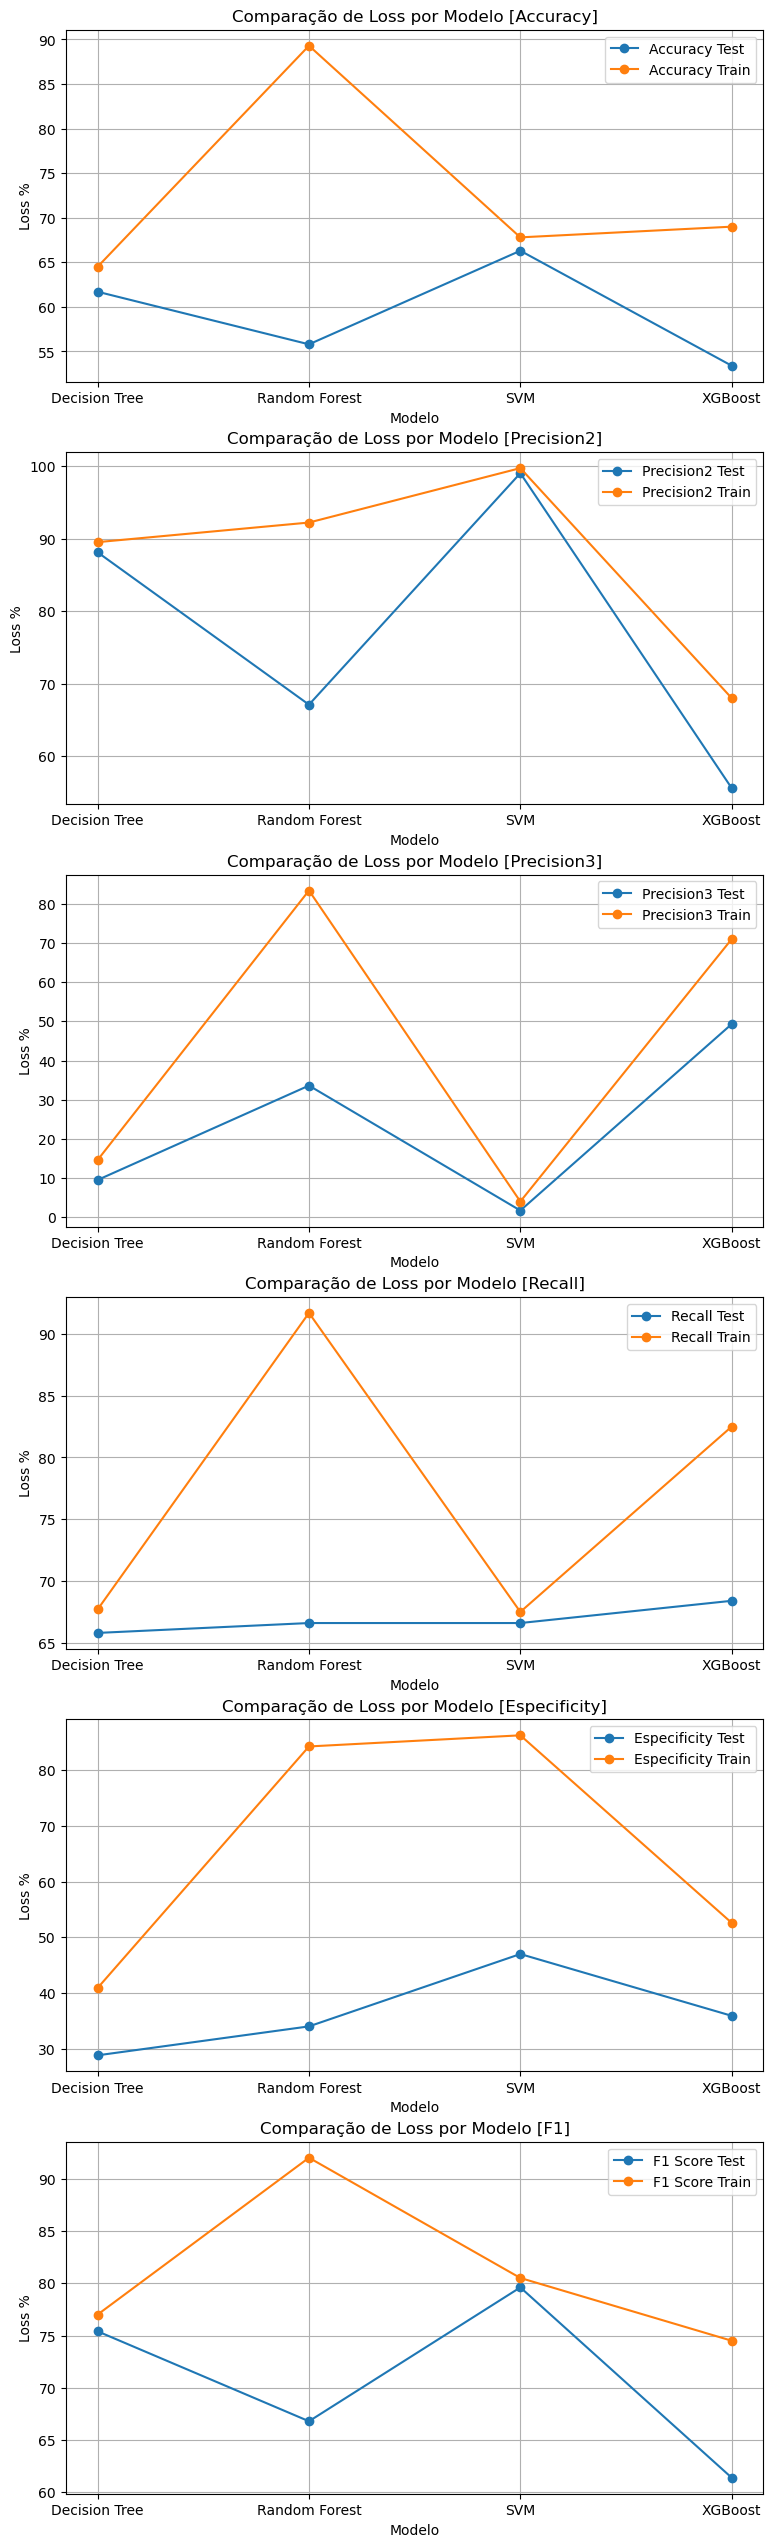

In [59]:
select = [
    ['Models', f'Accuracy {sample[0]}', f'Accuracy {sample[1]}'],
    ['Models', f'Precision2 {sample[0]}', f'Precision2 {sample[1]}'],
    ['Models', f'Precision3 {sample[0]}', f'Precision3 {sample[1]}'],
    ['Models', f'Recall {sample[0]}', f'Recall {sample[1]}'],
    ['Models', f'Especificity {sample[0]}', f'Especificity {sample[1]}'],
    ['Models', f'F1 Score {sample[0]}', f'F1 Score {sample[1]}'],
]

for i in range(6):
    df_melted = metrics[select[i]].melt(id_vars='Models', var_name='Conjunto', value_name='Loss')
    
    # Plot
    for conjunto in df_melted['Conjunto'].unique():
        subset = df_melted[df_melted['Conjunto'] == conjunto]
        axes[i].plot(subset['Models'], subset['Loss'], marker='o', label=conjunto)
    
    axes[i].set_title(f'Comparação de Loss por Modelo [{select[i][1].split()[0]}]')
    axes[i].set_xlabel('Modelo')
    axes[i].set_ylabel('Loss %')
    # plt.ylim(0, 100)
    axes[i].legend()
    axes[i].grid(True)
    # axes[i].set_tight_layout()
    # plt.show()

fig

In [60]:
%%capture
fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, dpi=500)

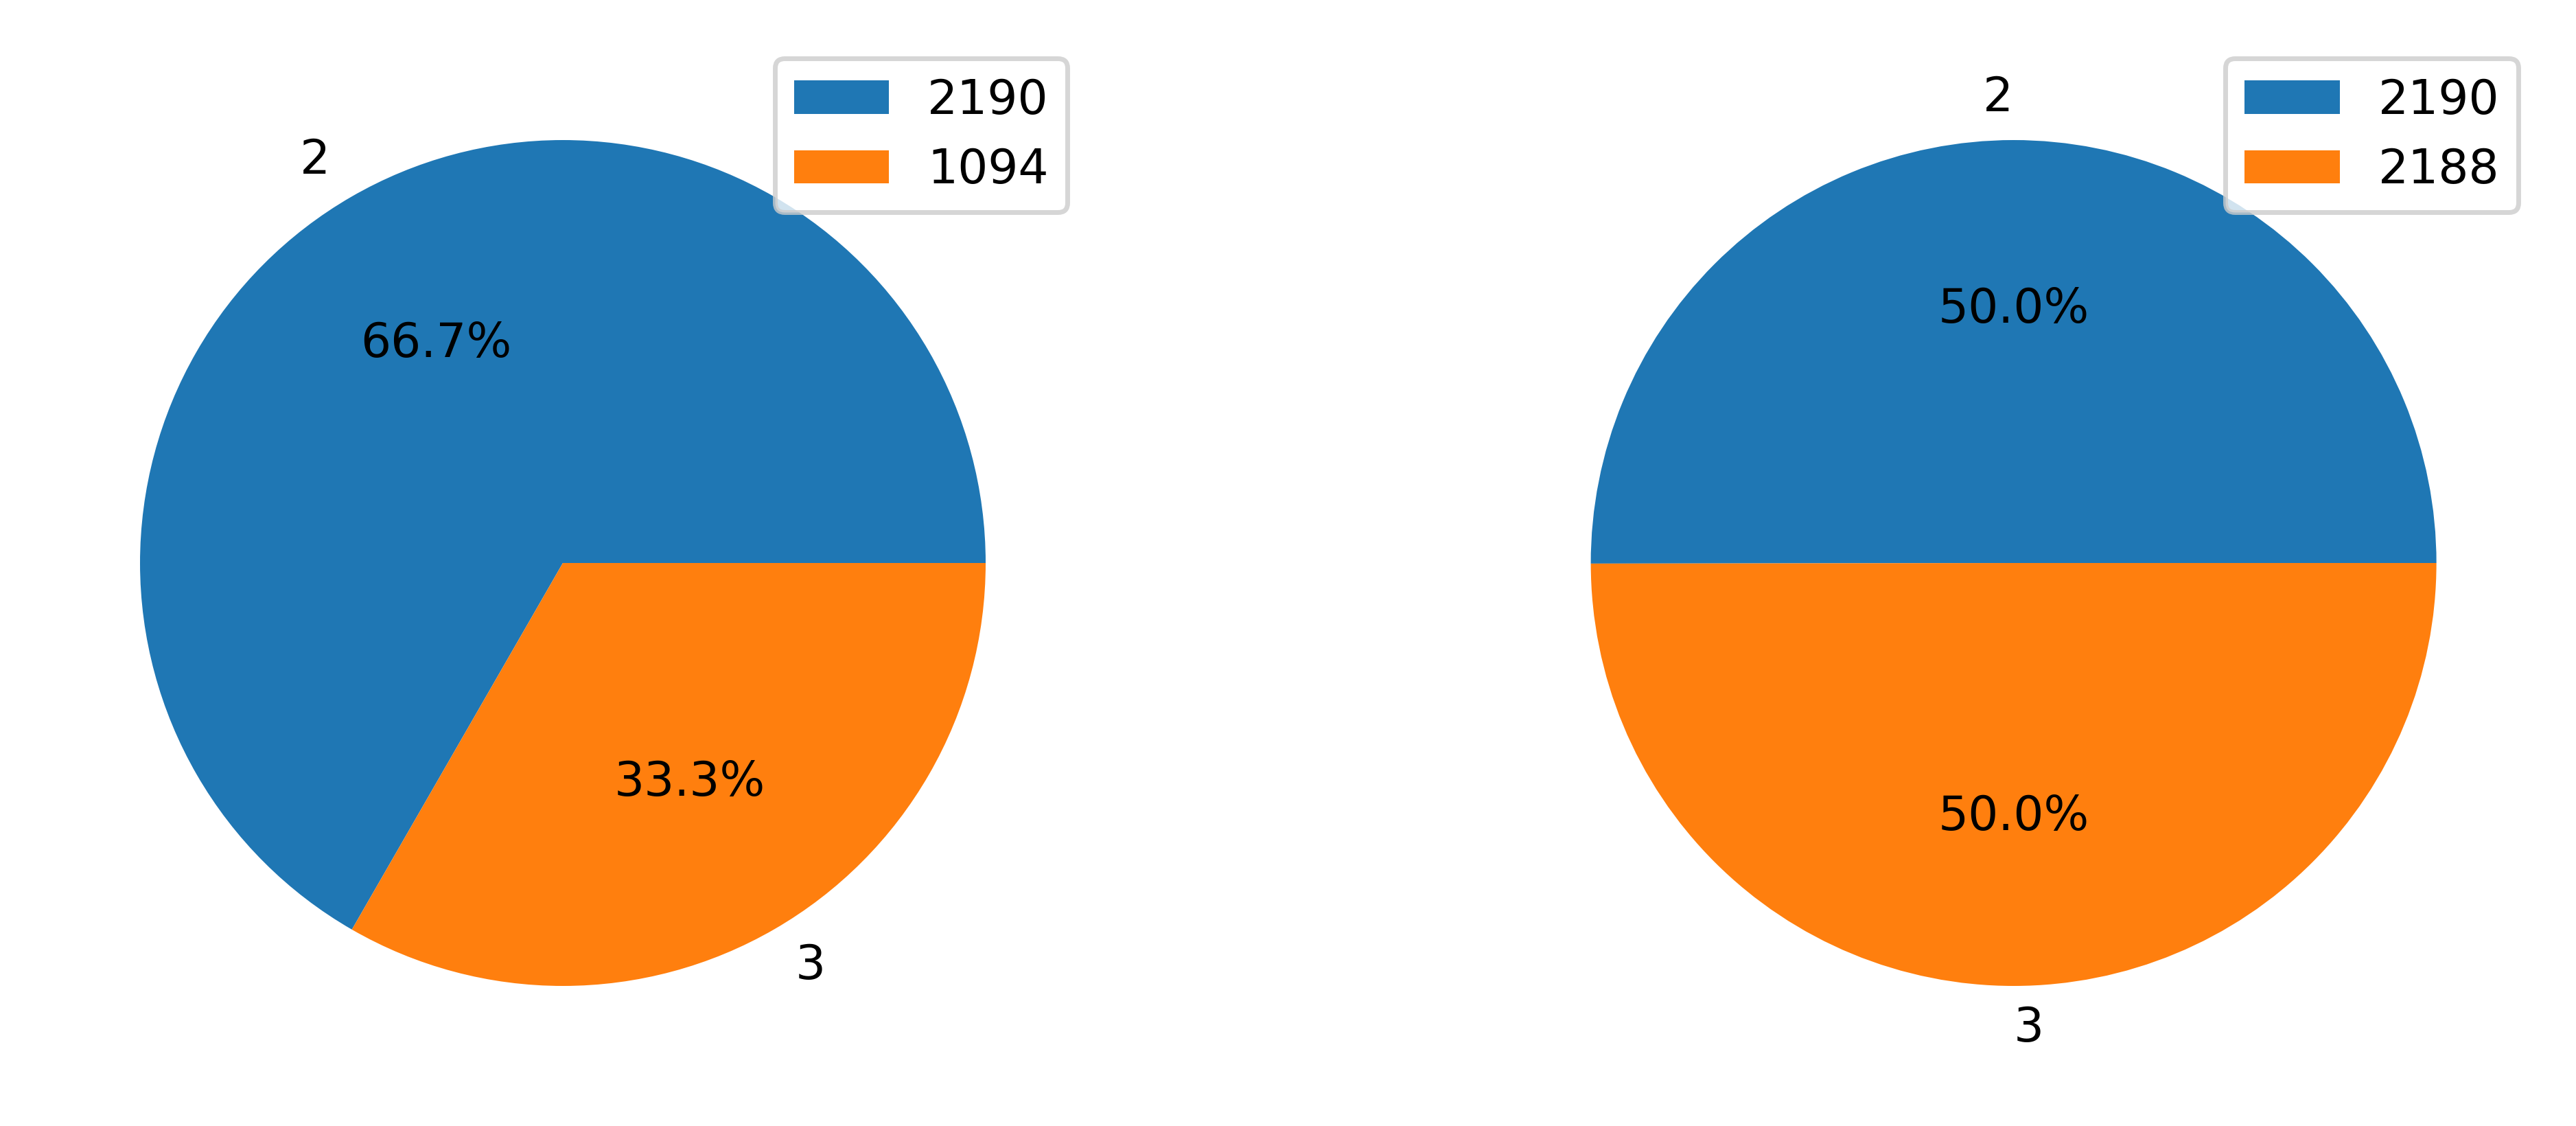

In [61]:
axes[0].pie(x=[2190, 1094], labels=['2', '3'], autopct='%1.1f%%')
axes[0].legend([2190, 1094])

axes[1].pie(x=[2190, 2188], labels=['2', '3'], autopct='%1.1f%%')
axes[1].legend([2190, 2188])
fig